<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: normal; font-size: 32px; color: #3AB77A;'>Desafio Creditas -</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'> Cientista de Dados Pleno</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Etapa 3: EDA</span>
</div>

<br><br>

<div style='color: #3AB77A; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Conteúdo desse Notebook
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Drop de mais algumas features</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Construção do Pipeline de input dos dados baseado na base de treinamento</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Analise dos dados, normalização e insights para novas hipóteses</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from utils.plot_utils import plotter as ptz

pd.set_option('display.max_columns', 500)
from utils.eda_utils import (
    get_all_information,
    summary_data,
    summary_data_cat,
    StartEda
)

from utils.model_utils import (
    ModelUtils,
    create_pipeline
)

import warnings
warnings.filterwarnings("ignore")

# Dessa vez utilizando a base bronze
df = pd.read_csv('../data/bronze_dataset.csv')

get_all_information(df=df, column_filter='pre_approved', column_target='sent_to_analysis')

df = df[df['pre_approved'] == 1].drop(['pre_approved'],axis=1)

# Realizando os processos de input de NA baseado na regra identificada anteriormente
control = StartEda(df=df, direct_input_cols=['collateral_debt','informed_restriction'])
df = control.df

# Analisando a problematica dos dados #
De todos os casos nessa base, reprovados temos 19820
De todos os casos nessa base, pré-aprovado temos 14976
Que realmente aprovamos para a analise de crédito foram 3262
Que realmente reprovamos para a analise de crédito foram 11714


<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'>Analisando resultado input NA via regra de negócio</span>
</div>

In [2]:
summary_data_cat(df=df)

,coluna,num_missings,valores_distintos,tamanho_base,perc_missing
0,city,0,2211,14976,0.000000
1,state,0,27,14976,0.000000
2,informed_purpose,582,8312,14976,0.038862
3,auto_brand,0,54,14976,0.000000
4,auto_model,0,1668,14976,0.000000
5,channel,0,10,14976,0.000000
6,zip_code,0,4381,14976,0.000000
7,landing_page_product,875,9,14976,0.058427
8,gender,0,3,14976,0.000000
9,education_level,2881,9,14976,0.192374


In [3]:
summary_data(df=df)

Essa função apenas analisa os casos int e float


,Coluna,num_missings,minimo,primeiro_quartil,mediana,media,terceiro_quartil,valores_distintos,tamanho_base,perc_missing
0,id,0,98327.0,128620.00,145654.5,142719.429688,159339.75,14976,14976,0.000000
1,age,0,18.0,30.00,36.0,38.368657,46.00,72,14976,0.000000
2,monthly_income,0,0.0,2500.00,4000.0,11012.025456,6000.00,1474,14976,0.000000
3,collateral_value,0,0.0,17000.00,23000.0,49123.283245,33434.75,1679,14976,0.000000
4,loan_amount,0,2500.0,6000.00,10500.0,14675.170131,18900.00,1014,14976,0.000000
5,collateral_debt,0,-1.0,-1.00,0.0,2829.255407,0.00,726,14976,0.000000
6,verified_restriction,0,-1.0,0.00,0.0,0.136952,0.00,3,14976,0.000000
7,dishonored_checks,0,0.0,0.00,0.0,0.019030,0.00,2,14976,0.000000
8,expired_debts,0,0.0,0.00,0.0,0.002671,0.00,2,14976,0.000000
9,banking_debts,0,0.0,0.00,0.0,0.061298,0.00,2,14976,0.000000


<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'>Realizando o split da base de dados</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #8ADAB4;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #8ADAB4; font-size: 20px;'>
  Inputamos via regra de negócio algumas variáveis, porém as demais, devem ser inputadas pela moda ou mediana/media, por isso realizando o split para evitar Leakage
</p>

In [ ]:
M

['age',
 'monthly_income',
 'collateral_value',
 'loan_amount',
 'collateral_debt',
 'verified_restriction',
 'dishonored_checks',
 'expired_debts',
 'banking_debts',
 'commercial_debts',
 'protests',
 'informed_restriction',
 'monthly_payment',
 'auto_year',
 'form_completed']

In [5]:
columns_ignore= [
 'id',
 'dishonored_checks',
 'expired_debts',
 'banking_debts',
 'commercial_debts',
 'protests',
 'informed_restriction',
 'form_completed',
 'verified_restriction'
]

columns_without = [
 'dishonored_checks',
 'expired_debts',
 'banking_debts',
 'commercial_debts',
 'protests',
 'informed_restriction',
 'form_completed',
 'verified_restriction'
]

pipe_prep = create_pipeline(
    df=X_train,
    columns_ignore=columns_ignore,
    columns_include_without_transformation=columns_without,
    ordinal_order=None,
    numerical_scaler=None,
    is_eda=True
) ; pipe_prep[0]

Ignorando essas colunas tanto para OneHot quanto para Numerical: ['id', 'dishonored_checks', 'expired_debts', 'banking_debts', 'commercial_debts', 'protests', 'informed_restriction', 'form_completed', 'verified_restriction']
['age', 'monthly_income', 'collateral_value', 'loan_amount', 'collateral_debt', 'monthly_payment', 'auto_year']
['city', 'state', 'informed_purpose', 'auto_brand', 'auto_model', 'channel', 'zip_code', 'landing_page_product', 'gender', 'education_level']
DataFrames criados sendo numericas:7, one_hot:10, ordinal:0
Pipelines criados, criando of FeatureUnion


FeatureUnion(transformer_list=[('pipe_num',
                                Pipeline(steps=[('selector_numerical',
                                                 ColumnTransformer(transformers=[('filter_num_cols',
                                                                                  'passthrough',
                                                                                  array(['age', 'monthly_income', 'collateral_value', 'loan_amount',
       'collateral_debt', 'monthly_payment', 'auto_year'], dtype=object))])),
                                                ('num_imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('NumScaler', None)])),
                               ('p...
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('OneHotEncoder', None)])),
                               ('pipe_sem_mexer',
                                Pipeline(steps=[('selector_one_hot',
                                                 ColumnTransformer(transformers=[('filter_ignore_cols',
                                                                                  'passthrough',
                                                                                  array(['dishonored_checks', 'expired_debts', 'banking_debts',
       'commercial_debts', 'protests', 'informed_restriction',
       'form_completed', 'verified_restriction'], dtype=object))]))]))],
             verbose=True)

In [6]:
X_train_eda = pipe_prep[0].fit_transform(X_train)
X_train_eda = pd.DataFrame(X_train_eda, 
                           columns=pipe_prep[1].tolist() + pipe_prep[2].tolist() + pipe_prep[3].tolist() + pipe_prep[4].tolist())

X_train_eda['set'] = 'train'

X_val_eda = pipe_prep[0].transform(X_val)
X_val_eda = pd.DataFrame(X_val_eda, 
                         columns=pipe_prep[1].tolist() + pipe_prep[2].tolist() + pipe_prep[3].tolist() + pipe_prep[4].tolist())

X_val_eda['set'] = 'val'

X_eda = pd.concat([X_train_eda, X_val_eda],axis=0)

for col in X_eda.columns:
    if col in ['monthly_income', 'collateral_value', 'loan_amount', 'collateral_debt', 'monthly_payment']:
        X_eda[col] = X_eda[col].astype('float64')
    elif col in ['age','auto_year']:
        X_eda[col] = X_eda[col].astype('int64')
    

[FeatureUnion] ...... (step 1 of 3) Processing pipe_num, total=   0.0s
[FeatureUnion] ...... (step 2 of 3) Processing pipe_hot, total=   0.0s
[FeatureUnion]  (step 3 of 3) Processing pipe_sem_mexer, total=   0.0s


In [7]:
summary_data_cat(df=X_eda)

,coluna,num_missings,valores_distintos,tamanho_base,perc_missing
0,city,0,1930,11665,0.0
1,state,0,27,11665,0.0
2,informed_purpose,0,6697,11665,0.0
3,auto_brand,0,49,11665,0.0
4,auto_model,0,1538,11665,0.0
5,channel,0,10,11665,0.0
6,zip_code,0,3993,11665,0.0
7,landing_page_product,0,8,11665,0.0
8,gender,0,3,11665,0.0
9,education_level,0,9,11665,0.0


In [8]:
summary_data(df=X_eda)

Essa função apenas analisa os casos int e float


,Coluna,num_missings,minimo,primeiro_quartil,mediana,media,terceiro_quartil,valores_distintos,tamanho_base,perc_missing
0,age,0,18.0,30.0,36.0,38.333562,46.0,69,11665,0.0
1,monthly_income,0,0.0,2500.0,4000.0,10402.381997,6000.0,1218,11665,0.0
2,collateral_value,0,0.0,17000.0,23000.0,50776.051853,33500.0,1381,11665,0.0
3,loan_amount,0,2500.0,6000.0,10500.0,14725.781549,18899.1,861,11665,0.0
4,collateral_debt,0,-1.0,-1.0,0.0,2145.632038,0.0,597,11665,0.0
5,monthly_payment,0,0.0,340.0,550.7,881.055184,825.0,2014,11665,0.0
6,auto_year,0,1986.0,2008.0,2010.0,2010.042778,2013.0,30,11665,0.0


<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'>EDA: Analisando os dados</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #8ADAB4;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #8ADAB4; font-size: 20px;'>
  Analisando os dados das features, buscando entender como elas contribuem e indicam o problema
</p>

In [9]:
X_eda = X_eda.reset_index(drop=True)
y_combined = pd.concat([y_train, y_val]).reset_index(drop=True)

X_eda['target'] = y_combined ; X_eda.columns

Index(['age', 'monthly_income', 'collateral_value', 'loan_amount',
       'collateral_debt', 'monthly_payment', 'auto_year', 'city', 'state',
       'informed_purpose', 'auto_brand', 'auto_model', 'channel', 'zip_code',
       'landing_page_product', 'gender', 'education_level',
       'dishonored_checks', 'expired_debts', 'banking_debts',
       'commercial_debts', 'protests', 'informed_restriction',
       'form_completed', 'verified_restriction', 'set', 'target'],
      dtype='object')

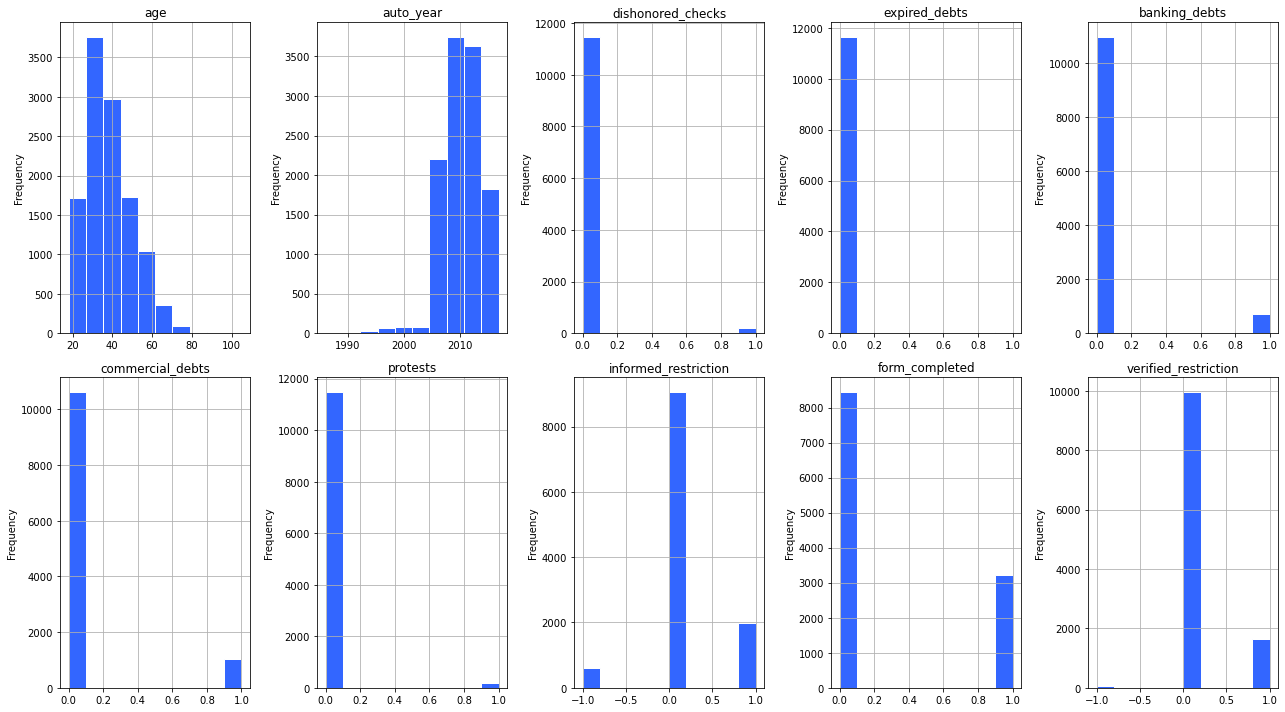

In [10]:
ptz.plotar_dist(df=X_eda[[
    'age',
    'auto_year',
    'dishonored_checks',
    'expired_debts',
    'banking_debts',
    'commercial_debts',
    'protests',
    'informed_restriction',	
    'form_completed',
    'verified_restriction'
]])

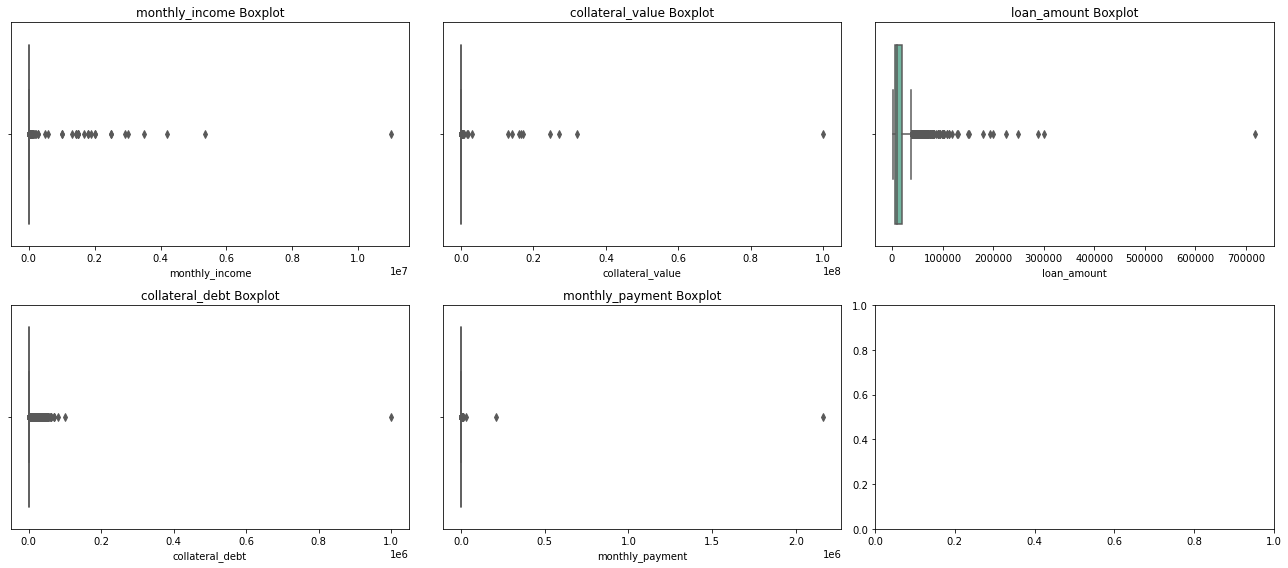

,monthly_income,collateral_value,loan_amount,collateral_debt,monthly_payment
count,"11,665.00","11,665.00","11,665.00","11,665.00","11,665.00"
mean,"10,402.38","50,776.05","14,725.78","2,145.63",881.06
std,"145,722.82","1,077,209.17","14,499.42","11,234.39","20,129.79"
min,0.00,0.00,"2,500.00",-1.00,0.00
25%,"2,500.00","17,000.00","6,000.00",-1.00,340.00
50%,"4,000.00","23,000.00","10,500.00",0.00,550.70
75%,"6,000.00","33,500.00","18,899.10",0.00,825.00
max,"11,000,000.00","99,999,999.00","719,000.00","1,000,000.00","2,163,888.89"


,monthly_income,collateral_value,loan_amount,collateral_debt,monthly_payment
0,"20,000.00","66,000.00","59,400.00",545.00,"2,521.62"
1,"12,000.00","116,000.00","50,000.00","4,000.00","1,617.67"
2,"15,000.00","65,000.00","41,033.43","24,900.00","1,583.33"
3,"11,500.00","70,000.00","65,000.00",4.50,"2,763.33"
4,"13,000.00","65,000.00","44,100.00","18,000.00","1,890.12"
...,...,...,...,...,...
2796,NaN,NaN,NaN,"11,000.00",NaN
2797,NaN,NaN,NaN,200.00,NaN
2798,NaN,NaN,NaN,"12,500.00",NaN
2799,NaN,NaN,NaN,"30,000.00",NaN


In [11]:
outliers = ptz.plotar_nested_boxplot(
    df=X_eda,
    cols=[
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment'
    ]
)

pd.options.display.float_format = '{:,.2f}'.format

display(X_eda[[
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment'
]].describe())

display(outliers[
    (~outliers['monthly_income'].isna()) |
    (~outliers['collateral_value'].isna()) |
    (~outliers['loan_amount'].isna()) |
    (~outliers['collateral_debt'].isna()) |
    (~outliers['monthly_payment'].isna())
])

Devido a presença de outliers que pesam muito a cauda da distribuição dessas variáveis, vou adotar a função arcsinh.

A função arcsinh suaviza os valores das features, possui imagem em 0 e ajuda a melhorar a dimensionalidade das features

É possível também utilizarmos o StandardScaler para garantir uma normalização dos dados.

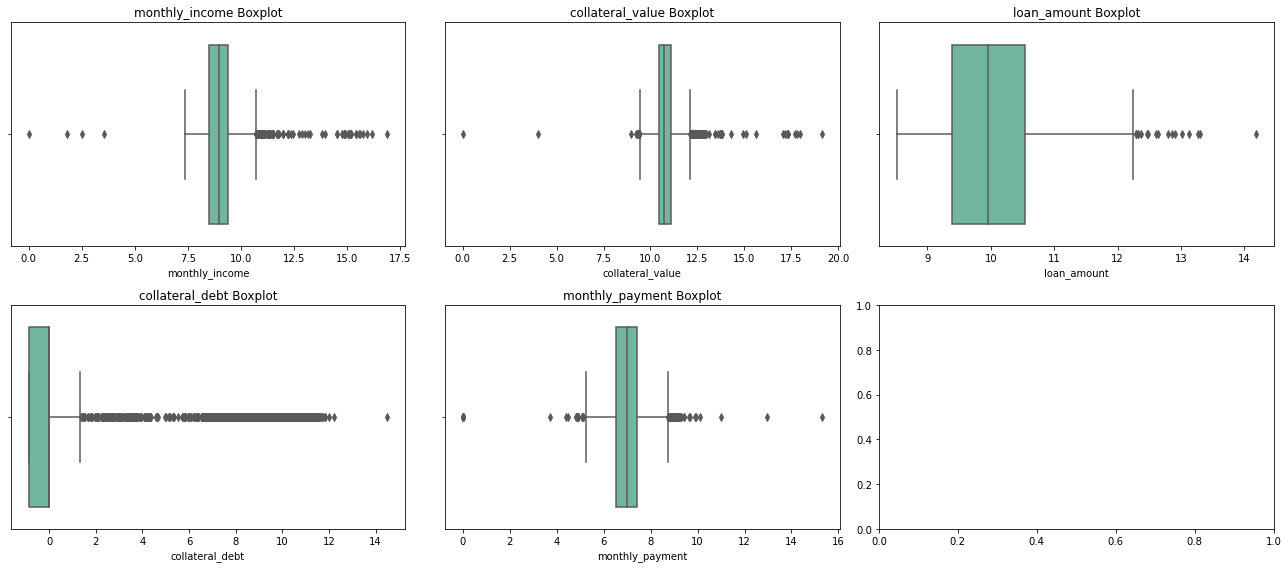

,monthly_income,collateral_value,loan_amount,collateral_debt,monthly_payment
count,"11,665.00","11,665.00","11,665.00","11,665.00","11,665.00"
mean,9.01,10.78,10.04,1.76,6.99
std,0.75,0.58,0.67,4.02,0.68
min,0.00,0.00,8.52,-0.88,0.00
25%,8.52,10.43,9.39,-0.88,6.52
50%,8.99,10.74,9.95,0.00,7.00
75%,9.39,11.11,10.54,0.00,7.41
max,16.91,19.11,14.18,14.51,15.28


,monthly_income,collateral_value,loan_amount,collateral_debt,monthly_payment
0,0.00,9.35,13.30,6.99,0.00
1,2.49,9.34,12.79,8.99,3.73
2,1.82,9.39,12.46,10.82,0.00
3,3.53,9.39,12.63,2.21,5.09
4,10.82,9.39,12.32,10.49,4.89
...,...,...,...,...,...
2794,NaN,NaN,NaN,10.00,NaN
2795,NaN,NaN,NaN,5.99,NaN
2796,NaN,NaN,NaN,10.13,NaN
2797,NaN,NaN,NaN,11.00,NaN


In [12]:
# Para transformação em tanh

for col in ['monthly_income', 'collateral_value', 'loan_amount', 'collateral_debt', 'monthly_payment']:
    X_eda[col] = np.arcsinh(X_eda[col])

outliers = ptz.plotar_nested_boxplot(
    df=X_eda,
    cols=[
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment'
    ]
)

pd.options.display.float_format = '{:,.2f}'.format

display(X_eda[[
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment'
]].describe())

display(outliers[
    (~outliers['monthly_income'].isna()) |
    (~outliers['collateral_value'].isna()) |
    (~outliers['loan_amount'].isna()) |
    (~outliers['collateral_debt'].isna()) |
    (~outliers['monthly_payment'].isna())
])

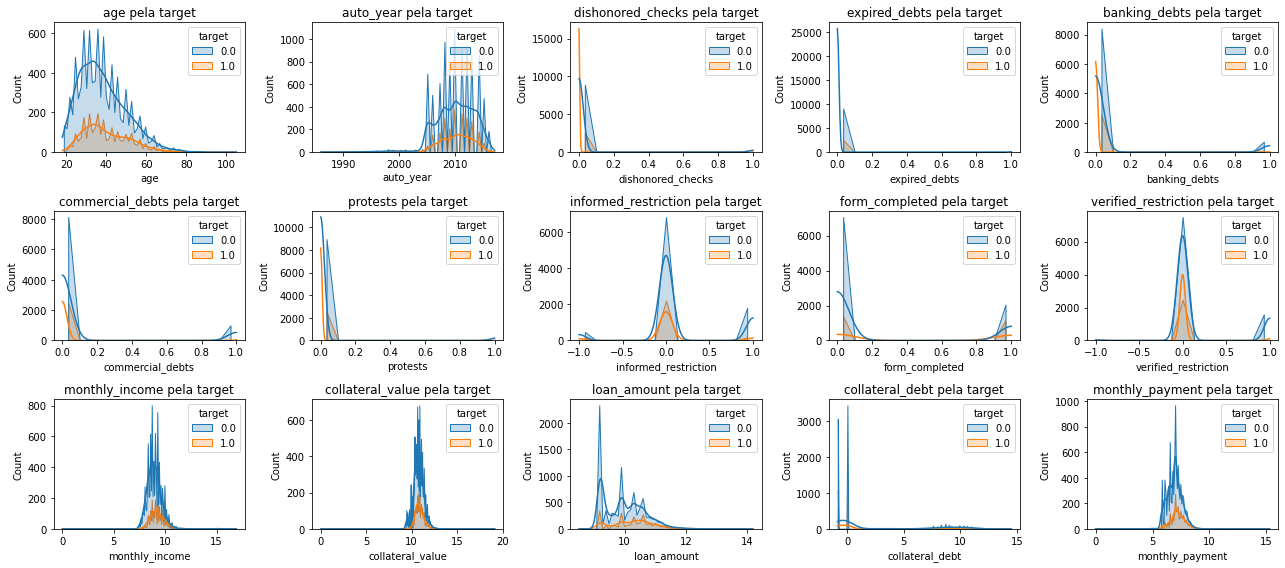

In [13]:
columns_list = [
    'age',
    'auto_year',
    'dishonored_checks',
    'expired_debts',
    'banking_debts',
    'commercial_debts',
    'protests',
    'informed_restriction',	
    'form_completed',
    'verified_restriction',
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment'
]


ptz.plotar_nested_dist(
    df=X_eda, 
    cols=columns_list,
    nrow=3, 
    ncol=5
)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'>Insights</span>
</div>

* Aparentemente, quanto menor a idade, maior a chance de avançar para analise de credito.
* Quanto maior o salário também vejo um aumento na aceitação.
* Quanto maior o loan_amount aparentemente pode ter correlação com o salário e consequentemente contribui para uma maior aceitação.

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #8ADAB4; font-size: 20px;'>
    Analisar a ECDF das variáveis
</p>

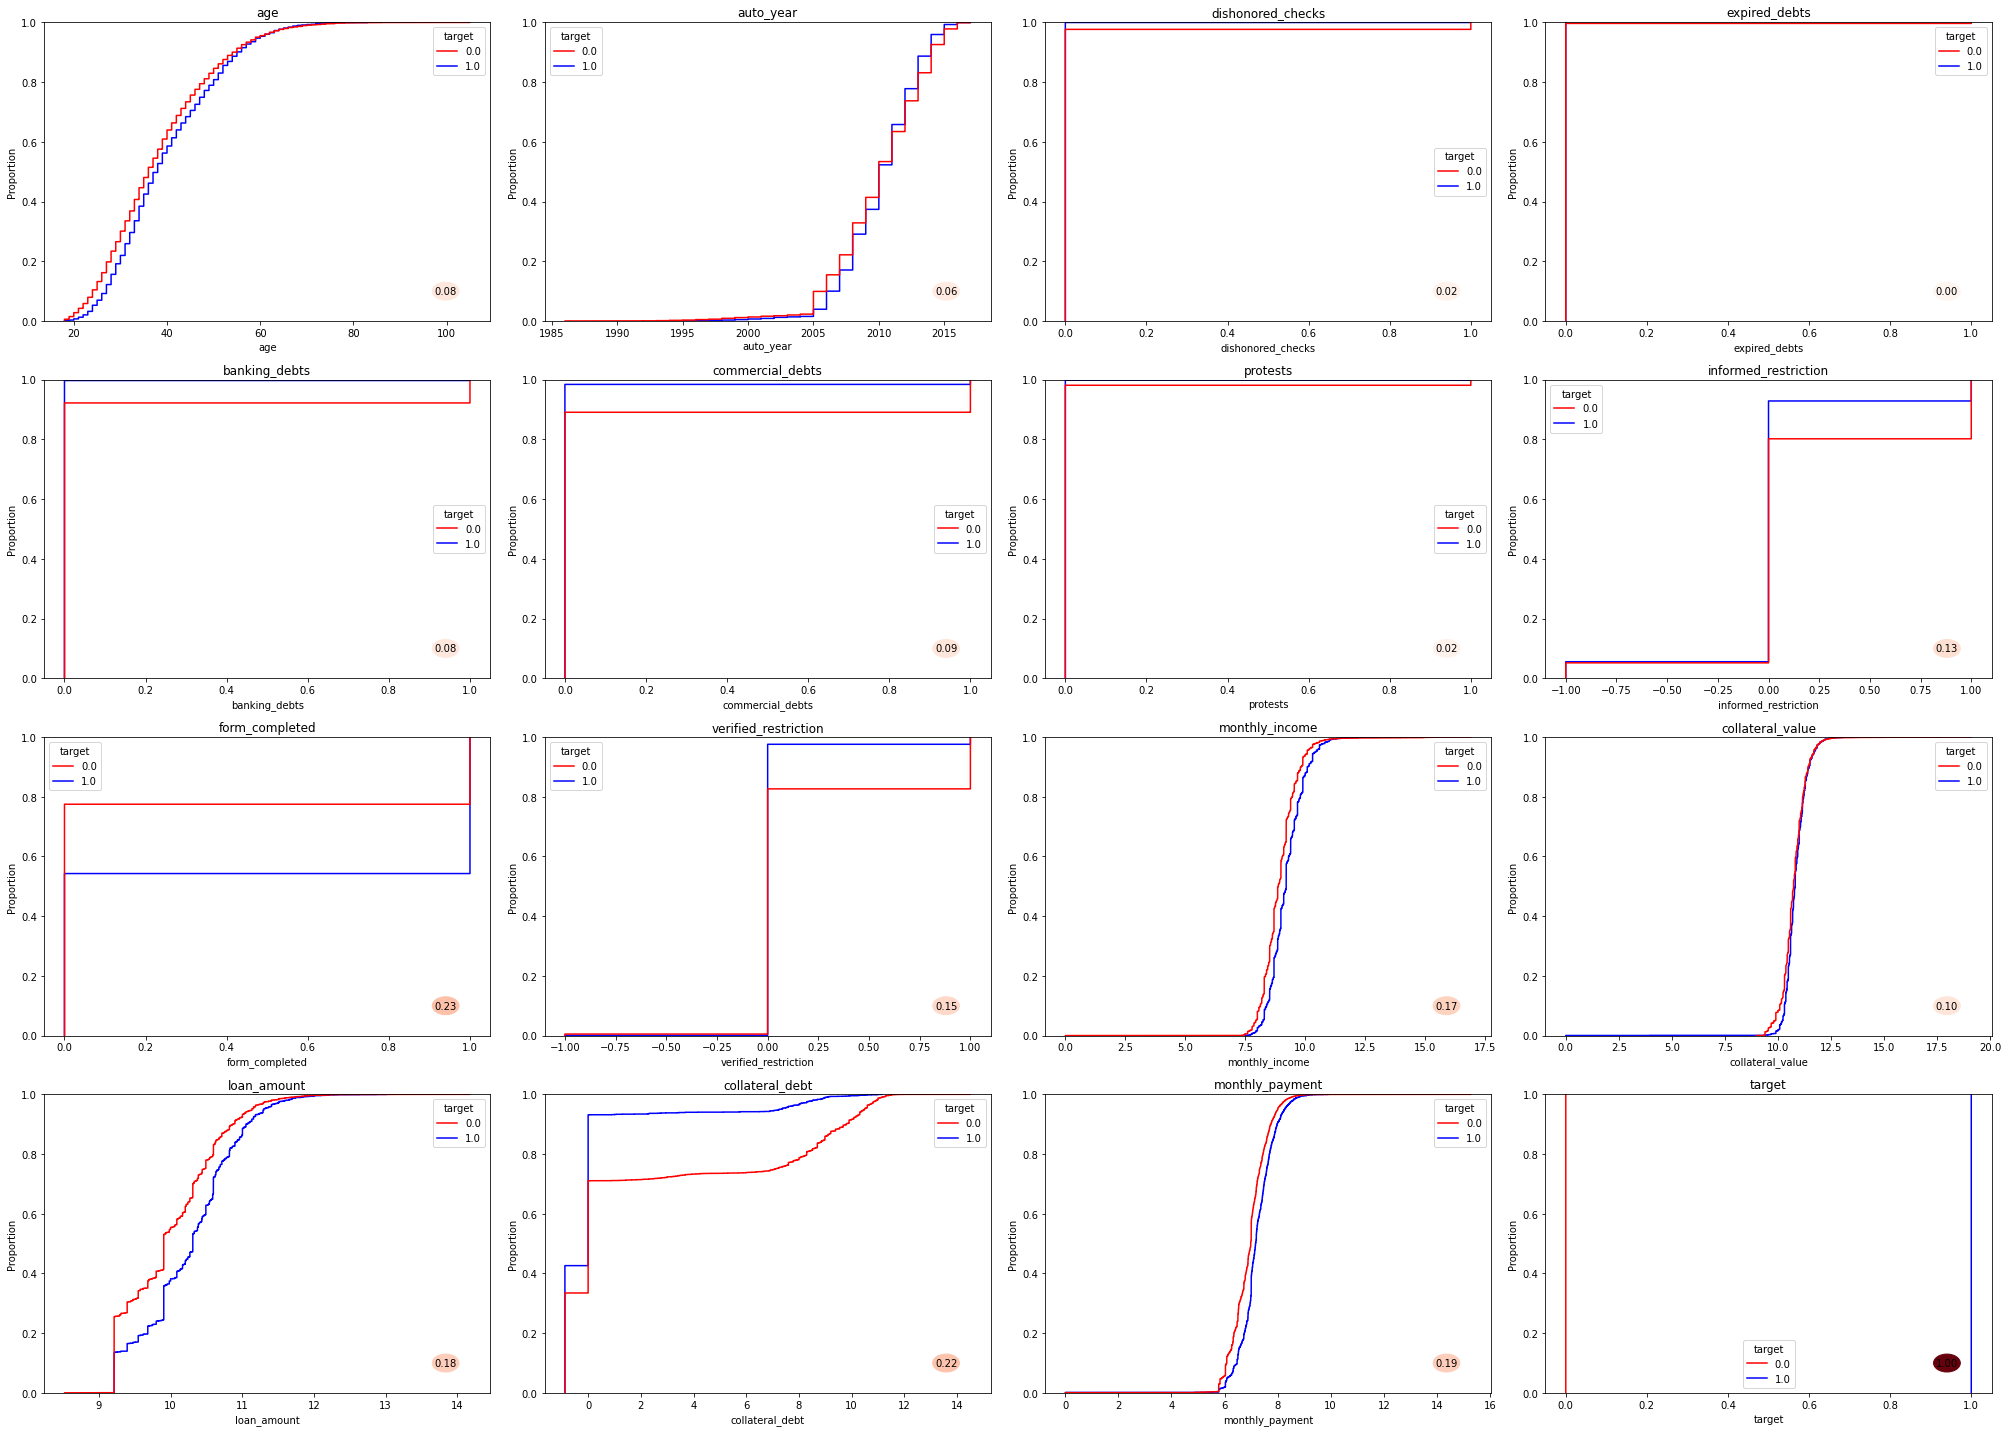

In [14]:
ptz.plot_ecdf_features(
    df=X_eda[[
        'age',
        'auto_year',
        'dishonored_checks',
        'expired_debts',
        'banking_debts',
        'commercial_debts',
        'protests',
        'informed_restriction',	
        'form_completed',
        'verified_restriction',
        'monthly_income',
        'collateral_value',
        'loan_amount',
        'collateral_debt',
        'monthly_payment',
        'target'
    ]],
    hue='target',
    figsize=(28,20)
)

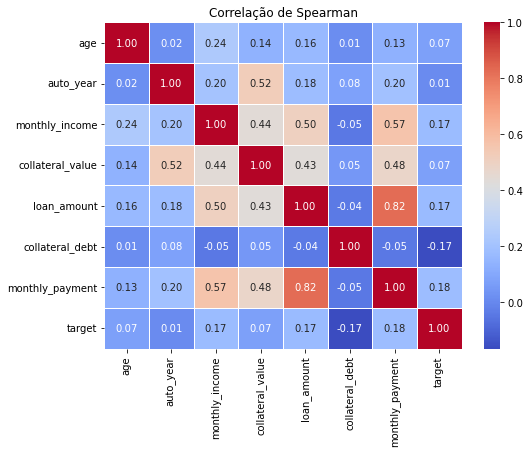

In [ ]:
ptz.corrplot(df=X_eda[[
    'age',
    'auto_year',
    'dishonored_checks',
    'expired_debts',
    'banking_debts',
    'commercial_debts',
    'protests',
    'informed_restriction',	
    'form_completed',
    'verified_restriction',
    'monthly_income',
    'collateral_value',
    'loan_amount',
    'collateral_debt',
    'monthly_payment',
    'target'
]]
)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3AB77A;'>Conclusões sobre a EDA voltada para modealgem</span>
</div>

<br>

* Features que demonstram ter uma forte relação com a target
* Correlação linear presente em algumas variavéis financeiras
* Collateral_debt contribui bastante para prever a aprovação para análise de crédito
* Quanto maior o valor do empréstimo, mais facil a aprovação para a análise de crédito
* Impedimentos nas flags, contribuem para a reprovação da análise de crédito
* Uma forte presença de outliers que precisa ser controlada nas características financeiras dos contratos

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #8ADAB4; font-size: 20px;'>
  Próximos passos é expandir essa análise em novas hipóteses e features, analisar mais as variáveis categórias e explorar outras soluções
</p>